# Creating an Attrition Report using a machine learning model



<div class="alert alert-success">
<b>About Dataset</b>

<u>Context</u>

This is a fictional data set created by IBM data scientists. Uncover the factors that lead to employee attrition and explore related human resource questions we need to analyze employee information.
 Typically job class specs have information which characterize the job class- its features, and a label- in this case a pay grade - something to predict that the features are related to.

<u>Content</u>

The data is a static snapshot. The contents are

<ol>
<li>Age</li>
    <li>Attrition <b>Target variable</b></li>
<li>BusinessTravel</li>
<li>DailyRate</li>
<li>    Department</li>
<li>    DistanceFromHome</li>
<li>    Education</li>
<li>    EducationField</li>
<li>    EmployeeCount</li>
<li>    EmployeeNumber</li>
<li>    EnvironmentSatisfaction</li>
<li>    Gender</li>
<li>    HourlyRate</li>
<li>    JobInvolvement</li>
<li>    JobLevel</li>
<li>    JobRole</li>
<li>    JobSatisfaction</li>
<li>    MaritalStatus</li>
<li>    MonthlyIncome</li>
<li>    MonthlyRate</li>
<li>    NumCompaniesWorked</li>
<li>    Over18</li>
<li>    OverTime</li>
<li>    PercentSalaryHike</li>
<li>    PerformanceRating</li>
<li>    RelationshipSatisfaction</li>
<li>    StandardHours</li>
<li>    StockOptionLevel</li>
<li>    TotalWorkingYears</li>
<li>    TrainingTimesLastYear</li>
<li>    WorkLifeBalance</li>
<li>    YearsAtCompany</li>
<li>    YearsInCurrentRole</li>
<li>    YearsSinceLastPromotion</li>
<li>    YearsWithCurrManager</li>
</ol>

<u>Acknowledgements</u>

This data is purely fictional

 <u>Inspiration</u>

The intent is to use machine learning classification algorithms to predict the attrition variable from the educational level to financial budget information.
    
</div>

<div class="alert alert-info"><b>Task</b>
    
Typically attrition detection in HR is time consuming and cumbersome as a manual activity. The intent is to show how machine learning and People Analytics can be brought to bear on this task.
       
</div>


In [1]:
#Dataset name "hackathon_1_sec_B.csv"

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#### Read CSV

In [3]:
df = pd.read_csv("hackathon_1_sec_B.csv")

#### Investigate dataset

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Feature selection

Statistically non-relevant data is dropped: Employee Count, over18 and and standard hours are all the same for the employees and thus, will not impact attrition. Also the Employee Number is not generalizable and will thus be dropped.

In [7]:
df = df.drop(columns = ["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"])

#### Investigate column types

In [8]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if df[col].dtype == object:
        categorical_features.append(col)
    else:
        numerical_features.append(col)
        
print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numerical features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


#### Investigate Age vs Attrition

<AxesSubplot:xlabel='Age', ylabel='count'>

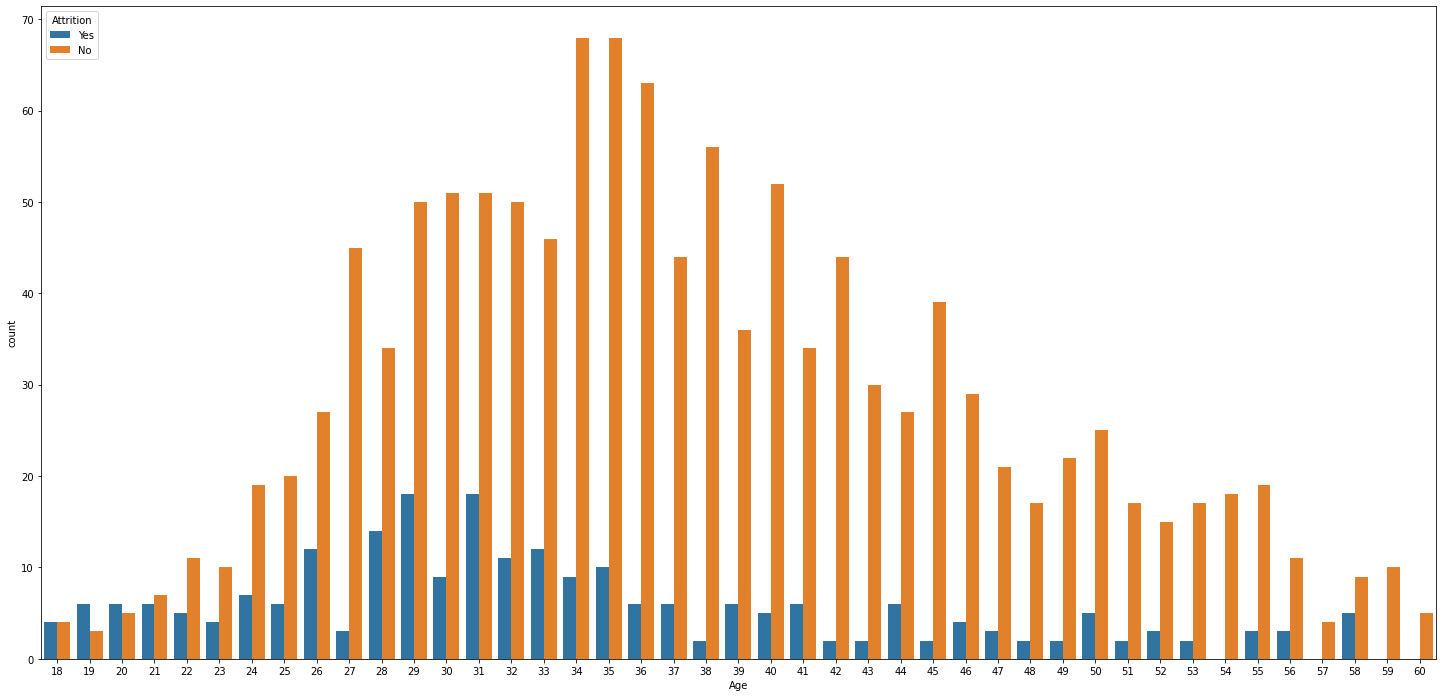

In [9]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = df)

In this case there seems to be a fairly gaussian distribution of age vs attrition, with a slight uplift at around age 58. This could be due to employees nearing retirement age. 

Text(0.5, 0, 'Age')

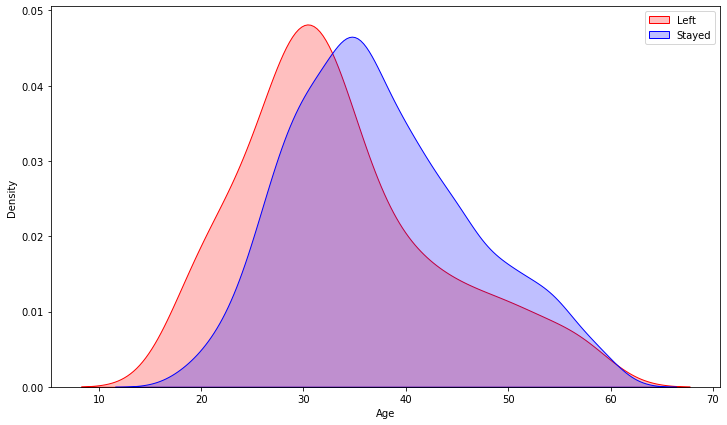

In [10]:
# Kernel Density Plot for Age (split by attrition)

left_df = df[df['Attrition'] == 'Yes']
stayed_df = df[df['Attrition'] == 'No']

plt.figure(figsize=(12,7))
sns.kdeplot(left_df['Age'], label = 'Left', shade = True, color = 'r')
sns.kdeplot(stayed_df['Age'], label = 'Stayed', shade = True, color = 'b')
plt.legend()
plt.xlabel('Age')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

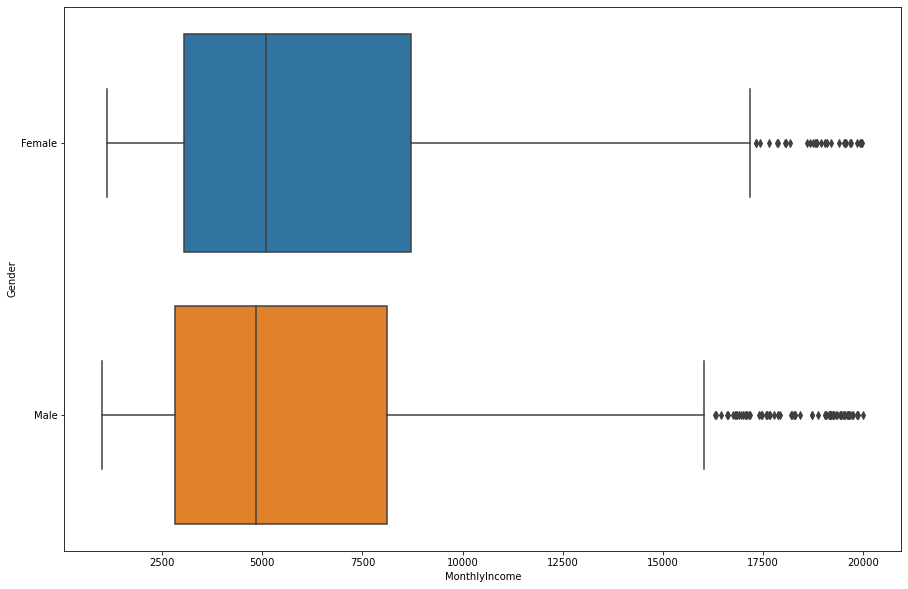

In [11]:
# Investigate monthly income against gender

plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y='Gender' , data = df)

#### Identify and remove outliers

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title

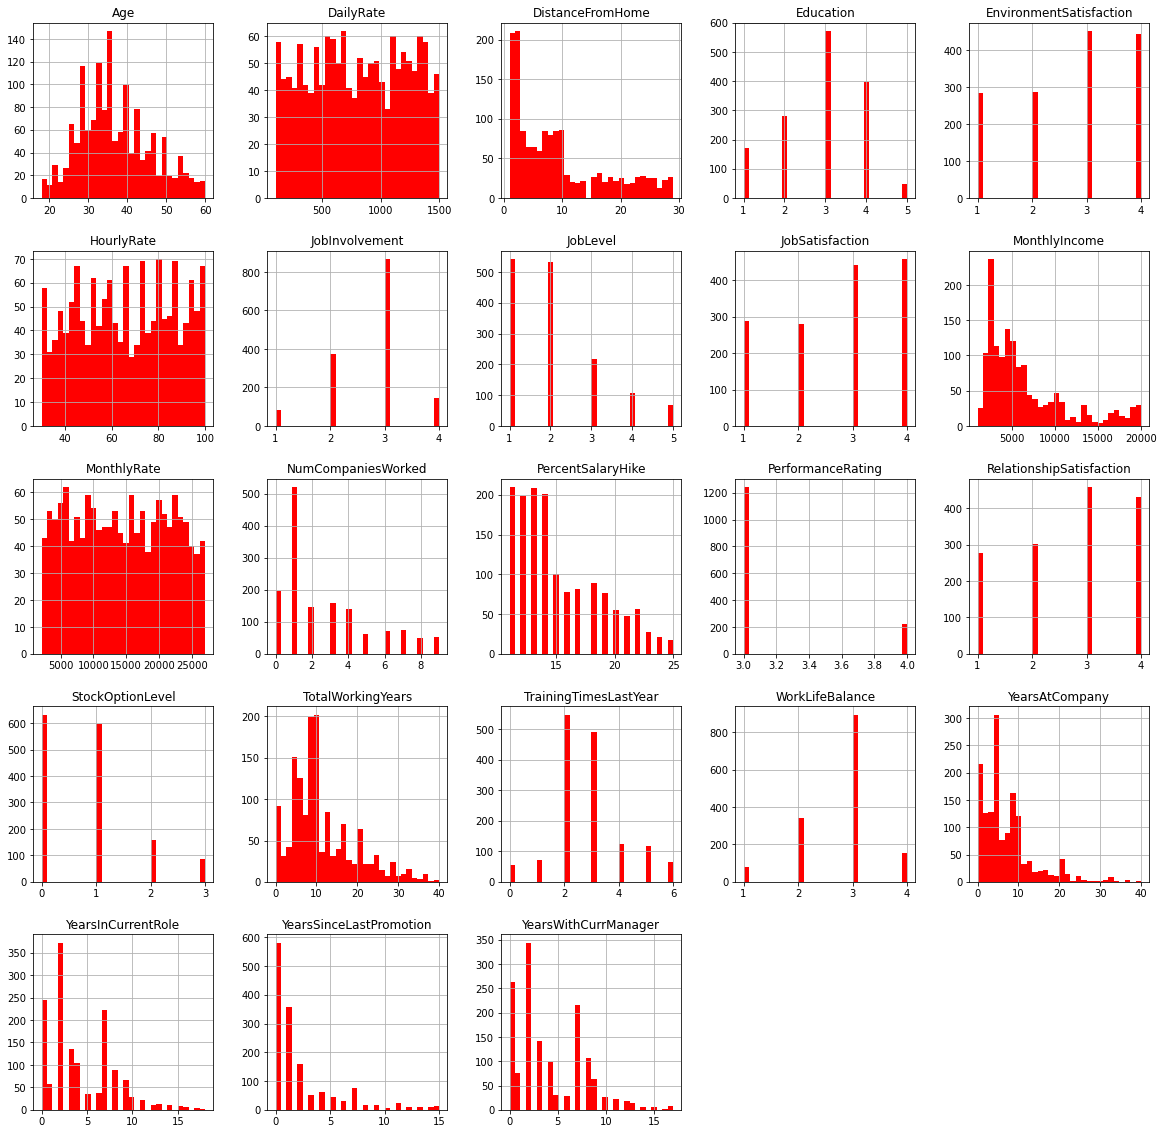

In [12]:
df.hist(bins = 30, figsize = (20,20), color = 'r')

<AxesSubplot:>

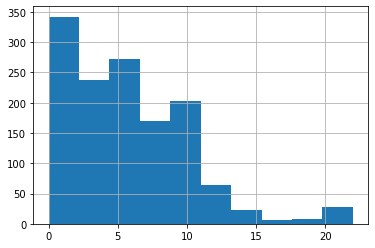

In [13]:
q_YearsCompany = df["YearsAtCompany"].quantile(.975)
q_YearsRole = df["YearsInCurrentRole"].quantile(.975)
q_YearsPromotion = df["YearsSinceLastPromotion"].quantile(.975)
q_YearsManager = df["YearsWithCurrManager"].quantile(.975)

df1 = df[(df["YearsAtCompany"] < q_YearsCompany) &
         (df["YearsInCurrentRole"] < q_YearsRole) &
         (df["YearsSinceLastPromotion"] < q_YearsPromotion) &
         (df["YearsWithCurrManager"] < q_YearsManager)]

df1["YearsAtCompany"].hist()

After analyzing the distribution graphs of the features, we chose to remove outliers from the following categories:"YearsAtCompany", "YearsInCurrentRole","YearsSinceLastPromotion", "YearsWithCurrManager". In doing so, we removed the top 2.5% quantile respectively

#### Encode the target variable

In [14]:
onehot_encoder_attrition = OneHotEncoder(sparse=False)
onehot_values_attrition = onehot_encoder_attrition.fit_transform(df1[['Attrition']])

In [15]:
df1['Attrition'] = onehot_values_attrition[:,1]

/var/folders/3j/yyt97tfx06q2l2t0_ftx0tn80000gn/T/ipykernel_32736/3107006906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Attrition'] = onehot_values_attrition[:,1]


#### Encode categorical variables for purposes of correlation exploration

Label encoding was used for the purposes of initial correlation examination, with One Hot Encoding being used for final model creation.

In [16]:
df2 = df1.copy(deep=True)

In [17]:
encoder = LabelEncoder()
for col in df2.columns:
    if df2[col].dtype == object:
        df2[col] = encoder.fit_transform(df2[col])

#### Explore correlations

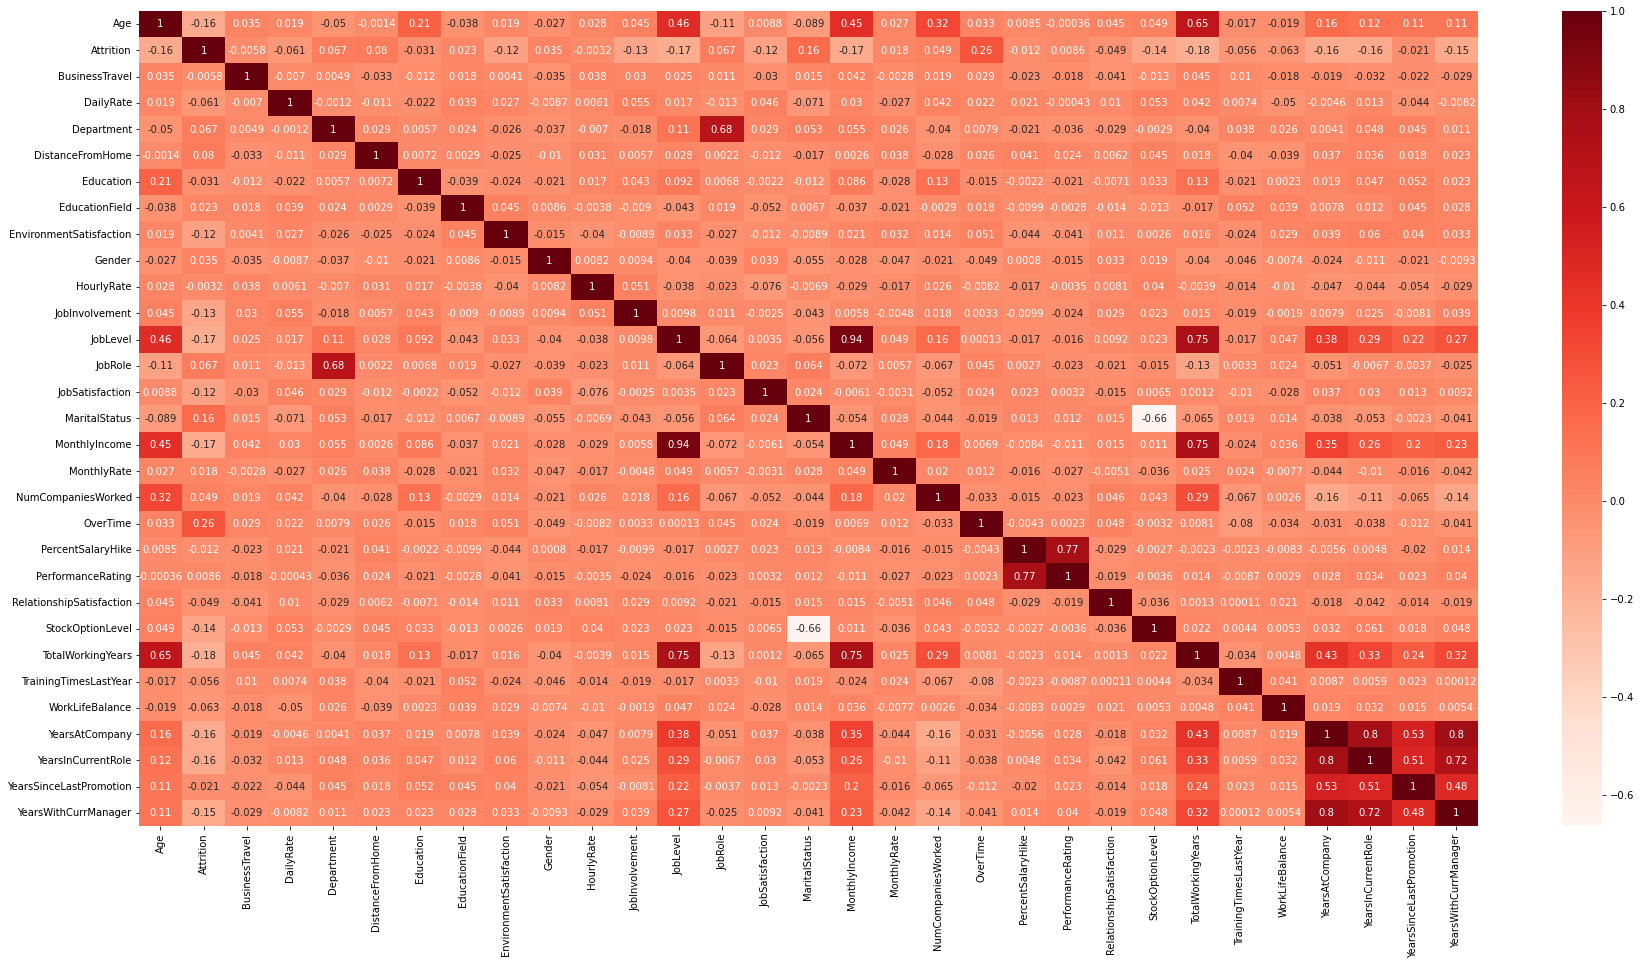

In [18]:
corr = df2.corr()
plt.figure(figsize = (30,15))
sns.heatmap(corr, annot = True, cmap = plt.cm.Reds)
plt.show()

#### Remove closely correlated features

In this case (using a threshold of >+-0.9) the following pair is deemed as highly correlated: <br>
- JobFamily & JobClass

The following code checks for the correlation between variables, stores them as pairs and then checks which variable in the pair is least correlated with the target variable before dropping it from the dataframe

In [19]:
# Create a list to store the columns to be dropped
columns_to_drop = []

# Calculate the pairwise correlation matrix
corr_matrix = df2.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_2 = upper.drop(columns = ["Attrition"])
upper_3 = upper_2.drop(index = ["Attrition"])

# Identify the pairs of highly correlated variables
correlated_pairs = []
for column in upper_3:
    for index in upper_3.index:
        if column != index and abs(upper_3[column][index]) > 0.9:
            correlated_pairs.append((column, index))

# Iterate over the correlated pairs and drop the variable with the lower correlation with the target variable
for pair in correlated_pairs:
    var1, var2 = pair
    if abs(upper[var1]['Attrition']) > abs(upper[var2]['Attrition']):
        columns_to_drop.append(var2)
    else:
        columns_to_drop.append(var1)
        
# Drop the columns from the dataframe
df_low_corr = df1.drop(columns = columns_to_drop, axis=1)

# Examine the resulting dataframe
df_low_corr.info()
df_low_corr.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1352 non-null   int64  
 1   Attrition                 1352 non-null   float64
 2   BusinessTravel            1352 non-null   object 
 3   DailyRate                 1352 non-null   int64  
 4   Department                1352 non-null   object 
 5   DistanceFromHome          1352 non-null   int64  
 6   Education                 1352 non-null   int64  
 7   EducationField            1352 non-null   object 
 8   EnvironmentSatisfaction   1352 non-null   int64  
 9   Gender                    1352 non-null   object 
 10  HourlyRate                1352 non-null   int64  
 11  JobInvolvement            1352 non-null   int64  
 12  JobLevel                  1352 non-null   int64  
 13  JobRole                   1352 non-null   object 
 14  JobSatis

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


#### Create train and test splits

In [20]:
X = df1.drop(columns = ["Attrition"])
y = df1["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
categorical_features_X = []
numerical_features_X = []

for col in X.columns:
    if X[col].dtype == object:
        categorical_features_X.append(col)
    else:
        numerical_features_X.append(col)
        
print("Categorical features:", categorical_features_X)
print("Numerical features:", numerical_features_X)

Categorical features: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numerical features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


#### Create Transformer

In this case, we opted for One Hot Encoding for final model creation in order to avoid any biases due to numerical magnitude associated with ordinal encoding which was not appropriate for this use case. 

In [22]:
# Creating the onehotencoder transformer
transformer = ColumnTransformer([("ohe", OneHotEncoder(sparse = False), categorical_features_X)], 
                                remainder = 'passthrough')

#### Create scaler

In [23]:
norm = StandardScaler()

#### Create model: Logistic Regression

In [24]:

lr = LogisticRegression()

steps_lr = [("data_cleaning", transformer),
            ("normalization", norm),
            ("training", lr)]

pipe_lr = Pipeline(steps_lr)

#### Create model: Decision Tree

In [25]:

dec_tree = DecisionTreeClassifier()

steps_dec_tree = [("data_cleaning", transformer),
            ("normalization", norm),
            ("training", dec_tree)]

pipe_tree = Pipeline(steps_dec_tree)

#### Create model: Random Classifier

In [26]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

steps_clf = [("data_cleaning", transformer),
            ("normalization", norm),
            ("training", clf)]

pipe_clf = Pipeline(steps_clf)

#### Evaluate models

In [27]:
# Logistic Regression
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
accuracy_lr = pipe_lr.score(X_test, y_test)
precision_lr = metrics.precision_score(y_test, y_pred_lr)
recall_lr = metrics.recall_score(y_test, y_pred_lr)

print("accuracy:", accuracy_lr)
print("precision:", precision_lr)
print("recall:", recall_lr)

accuracy: 0.9053254437869822
precision: 0.7297297297297297
recall: 0.5510204081632653


In [28]:
# Decision Tree
pipe_tree.fit(X_train, y_train)
y_pred_tree = pipe_tree.predict(X_test)
accuracy_tree = pipe_tree.score(X_test, y_test)
precision_tree = metrics.precision_score(y_test, y_pred_tree)
recall_tree = metrics.recall_score(y_test, y_pred_tree)

print("accuracy:", accuracy_tree)
print("precision:", precision_tree)
print("recall:", recall_tree)

accuracy: 0.7840236686390533
precision: 0.33783783783783783
recall: 0.5102040816326531


In [29]:
# Random Classifier

pipe_clf.fit(X_train, y_train)
y_pred_clf = pipe_clf.predict(X_test)
accuracy_clf = pipe_clf.score(X_test, y_test)
precision_clf = metrics.precision_score(y_test, y_pred_clf)
recall_clf = metrics.recall_score(y_test, y_pred_clf)

print("accuracy:", accuracy_clf)
print("precision:", precision_clf)
print("recall:", recall_clf)

accuracy: 0.8846153846153846
precision: 0.9166666666666666
recall: 0.22448979591836735


#### Compare results

In [30]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Classifier']
accuracy_list = [accuracy_lr, accuracy_tree, accuracy_clf]
precision_list = [precision_lr, precision_tree, precision_clf]
recall_list = [recall_lr, recall_tree, recall_clf]

In [31]:
compare_dict = {"Model": model_names, "Accuracy": accuracy_list, "Precision": precision_list, "recall": recall_list}
compare_df = pd.DataFrame(compare_dict)
compare_df

,Model,Accuracy,Precision,recall
0,Logistic Regression,0.905325,0.729730,0.551020
1,Decision Tree,0.784024,0.337838,0.510204
2,Random Classifier,0.884615,0.916667,0.224490


Since an employee leaving our company is much more costly to us than taking measures to retain them, we chose the model to maximize Recall. This as the logistic regression model. The costs of replacing a leaving employee contain buckets such as training costs, drop in productivity, hiring process etc. If we knew what led to attrition, we could prevent it. 

#### Feature importance

In [32]:
print(lr.coef_)

[[-0.40610837  0.37967088 -0.06110274 -0.1229364   0.28333991 -0.23891791
   0.10282204 -0.10073924  0.03317799 -0.07028713 -0.01905681  0.20782593
  -0.15410762  0.15410762 -0.27350444  0.32221853  0.10030124  0.00463498
  -0.2497013  -0.7142867  -0.24652521  0.4483849   0.45807843 -0.19006354
  -0.13753767  0.31605859 -0.46096766  0.46096766 -0.22294126 -0.10161318
   0.33757366 -0.04721227 -0.56996274  0.06859163 -0.3954753   0.19136833
  -0.48467395 -0.20443337  0.00355216  0.53499174  0.01098971 -0.05394686
  -0.32067018 -0.07616138 -0.54885945 -0.18547865 -0.32253336  0.10111024
  -0.36773351  0.54685254 -0.26350224]]


In the outlook, we would map the coefficients to the labels and see feature importance to take relevant measures.

#### Cross validation for the Logistic Regression

In [33]:
scores = cross_val_score(pipe_lr, X, y, cv = 5)
scores.mean()

0.8742517425174252

In this case, there was only a marginal difference between the results using cross-validation, meaning the model is not overfitted, and can safely be applied to real-life use cases.